TEMPORAL COVERAGE ANALYSIS

📊 Overall Coverage:
   Total observations: 1,989
   Date range: 2014-08-13 to 2025-11-04
   Total days: 4,101
   Coverage density: 0.485 obs/day

⏱️  Gap Statistics:
   Mean gap: 2.06 days
   Median gap: 1.00 days
   Std deviation: 2.91 days
   Minimum gap: 0 day(s)
   Maximum gap: 39 days

📈 Gap Percentiles:
   25th percentile: 0.0 days
   50th percentile: 1.0 days
   75th percentile: 3.0 days
   90th percentile: 6.0 days
   95th percentile: 6.0 days
   99th percentile: 12.1 days

📊 Gap Distribution:
   (-0.001, 1.0]: 1050 ( 52.8%)
   (1.0, 2.0]:  147 (  7.4%)
   (2.0, 3.0]:  447 ( 22.5%)
   (3.0, 4.0]:   76 (  3.8%)
   (4.0, 5.0]:   68 (  3.4%)
   (5.0, 7.0]:  141 (  7.1%)
   (7.0, 10.0]:   26 (  1.3%)
   (10.0, 15.0]:   19 (  1.0%)
   (15.0, 30.0]:   12 (  0.6%)
   (30.0, 100.0]:    2 (  0.1%)

🌧️  Monsoon Period (June-September):
   Observations: 683
   Mean gap: 5.96 days
   Median gap: 1.00 days
   Max gap: 273 days

📅 Mean Gap by Year:
      Mean Gap 

/var/folders/78/p3gqt9651qs0hpq8s21hsn340000gn/T/ipykernel_97982/3796673421.py:120: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 1].boxplot([monsoon_gaps, non_monsoon_gaps],



✓ Visualization saved as 'sar_temporal_coverage_analysis.png'
✓ Detailed gap report saved as 'sar_gap_analysis.csv'

ANALYSIS COMPLETE


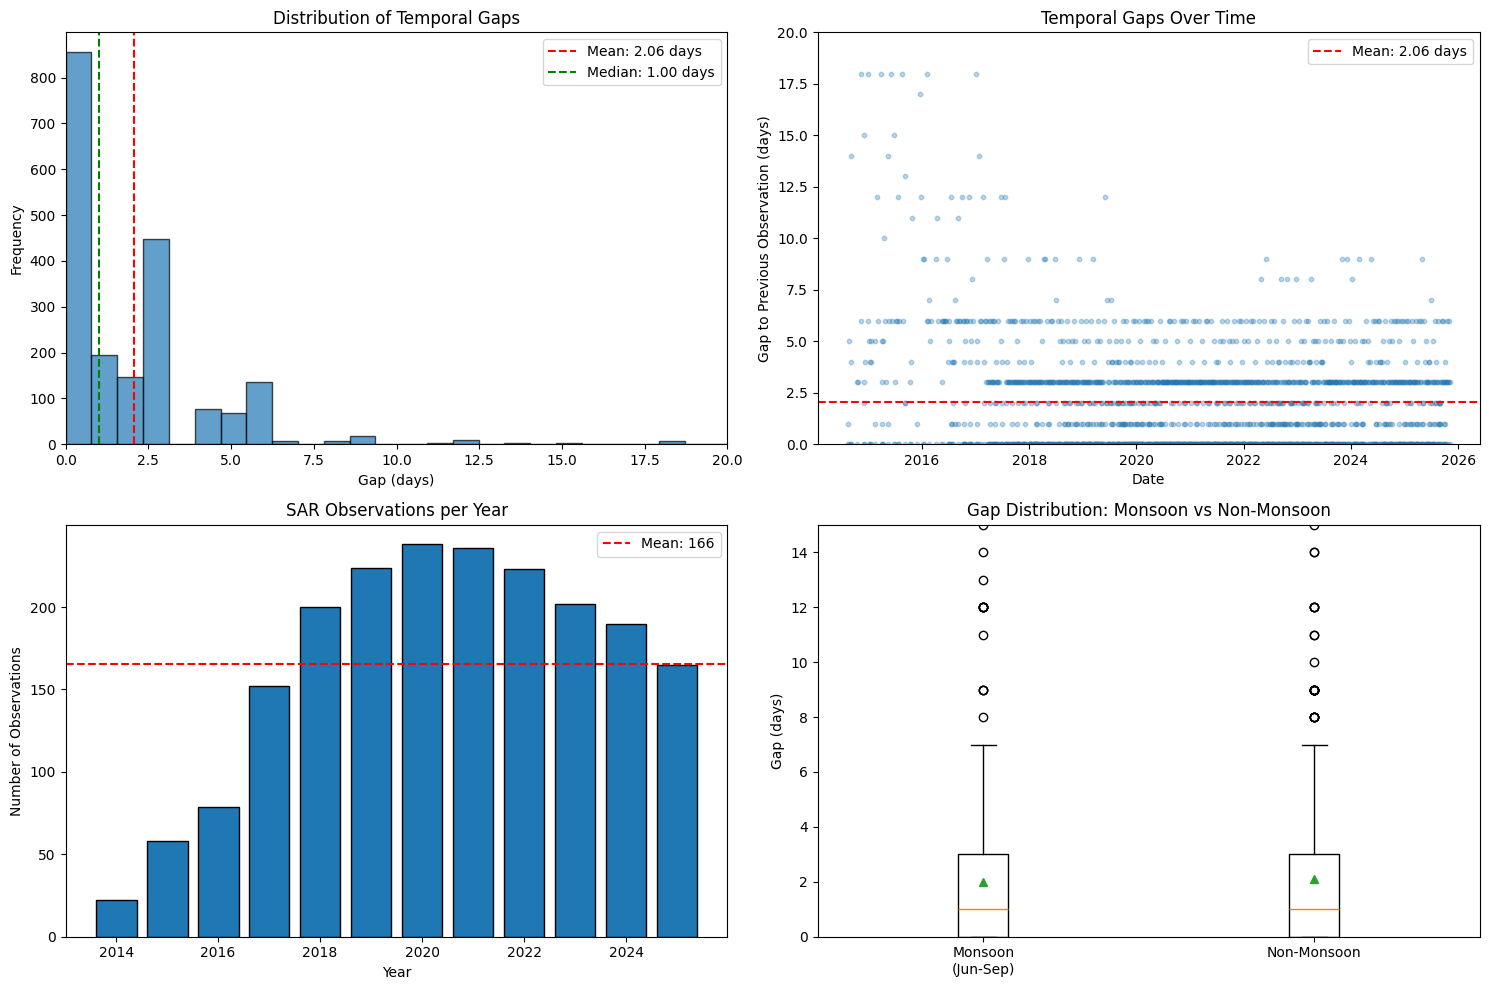

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the exported dates
df = pd.read_csv('../data/sar/SAR_dates_2014_2025.csv')
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date').reset_index(drop=True)

# Calculate gaps between consecutive observations
df['gap_days'] = df['date'].diff().dt.days

print("=" * 60)
print("TEMPORAL COVERAGE ANALYSIS")
print("=" * 60)

# Overall statistics
print(f"\n📊 Overall Coverage:")
print(f"   Total observations: {len(df):,}")
print(f"   Date range: {df['date'].min().date()} to {df['date'].max().date()}")
print(f"   Total days: {(df['date'].max() - df['date'].min()).days:,}")
print(f"   Coverage density: {len(df) / (df['date'].max() - df['date'].min()).days:.3f} obs/day")

# Gap statistics
print(f"\n⏱️  Gap Statistics:")
print(f"   Mean gap: {df['gap_days'].mean():.2f} days")
print(f"   Median gap: {df['gap_days'].median():.2f} days")
print(f"   Std deviation: {df['gap_days'].std():.2f} days")
print(f"   Minimum gap: {df['gap_days'].min():.0f} day(s)")
print(f"   Maximum gap: {df['gap_days'].max():.0f} days")

# Percentiles
print(f"\n📈 Gap Percentiles:")
for p in [25, 50, 75, 90, 95, 99]:
    val = df['gap_days'].quantile(p/100)
    print(f"   {p}th percentile: {val:.1f} days")

# Gap distribution
print(f"\n📊 Gap Distribution:")
gap_bins = [0, 1, 2, 3, 4, 5, 7, 10, 15, 30, 100]
gap_counts = pd.cut(df['gap_days'], bins=gap_bins, include_lowest=True).value_counts().sort_index()
for interval, count in gap_counts.items():
    pct = count / len(df) * 100
    print(f"   {interval}: {count:4d} ({pct:5.1f}%)")

# Monsoon-specific analysis
print(f"\n🌧️  Monsoon Period (June-September):")
monsoon = df[df['date'].dt.month.isin([6, 7, 8, 9])].copy()
monsoon['gap_days'] = monsoon['date'].diff().dt.days
print(f"   Observations: {len(monsoon):,}")
print(f"   Mean gap: {monsoon['gap_days'].mean():.2f} days")
print(f"   Median gap: {monsoon['gap_days'].median():.2f} days")
print(f"   Max gap: {monsoon['gap_days'].max():.0f} days")

# Year-by-year gap analysis
print(f"\n📅 Mean Gap by Year:")
yearly_gaps = df.groupby(df['date'].dt.year)['gap_days'].agg(['mean', 'max', 'count'])
yearly_gaps.columns = ['Mean Gap', 'Max Gap', 'Observations']
print(yearly_gaps)

# Flood event capture estimate
print(f"\n🎯 Flood Event Capture Estimate:")
print(f"   Assuming floods last 1-3 days:")
gaps_under_3 = (df['gap_days'] <= 3).sum()
capture_rate = gaps_under_3 / len(df) * 100
print(f"   Gaps ≤3 days: {gaps_under_3}/{len(df)} ({capture_rate:.1f}%)")
print(f"   Estimated event capture: {capture_rate:.1f}%")

# Identify problematic gaps
print(f"\n⚠️  Large Gaps (>7 days):")
large_gaps = df[df['gap_days'] > 7].copy()
print(f"   Count: {len(large_gaps)}")
if len(large_gaps) > 0:
    print(f"\n   Top 10 largest gaps:")
    top_gaps = large_gaps.nlargest(10, 'gap_days')[['date', 'gap_days']]
    for idx, row in top_gaps.iterrows():
        print(f"      {row['date'].date()}: {row['gap_days']:.0f} days")

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Gap distribution histogram
axes[0, 0].hist(df['gap_days'].dropna(), bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].axvline(df['gap_days'].mean(), color='red', linestyle='--', 
                   label=f'Mean: {df["gap_days"].mean():.2f} days')
axes[0, 0].axvline(df['gap_days'].median(), color='green', linestyle='--',
                   label=f'Median: {df["gap_days"].median():.2f} days')
axes[0, 0].set_xlabel('Gap (days)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Temporal Gaps')
axes[0, 0].legend()
axes[0, 0].set_xlim(0, 20)

# 2. Gap over time
axes[0, 1].scatter(df['date'][1:], df['gap_days'][1:], alpha=0.3, s=10)
axes[0, 1].axhline(df['gap_days'].mean(), color='red', linestyle='--',
                   label=f'Mean: {df["gap_days"].mean():.2f} days')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('Gap to Previous Observation (days)')
axes[0, 1].set_title('Temporal Gaps Over Time')
axes[0, 1].legend()
axes[0, 1].set_ylim(0, 20)

# 3. Observations per year
yearly_counts = df.groupby(df['date'].dt.year).size()
axes[1, 0].bar(yearly_counts.index, yearly_counts.values, edgecolor='black')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Number of Observations')
axes[1, 0].set_title('SAR Observations per Year')
axes[1, 0].axhline(yearly_counts.mean(), color='red', linestyle='--',
                   label=f'Mean: {yearly_counts.mean():.0f}')
axes[1, 0].legend()

# 4. Monsoon vs non-monsoon gaps
df['is_monsoon'] = df['date'].dt.month.isin([6, 7, 8, 9])
monsoon_gaps = df[df['is_monsoon']]['gap_days'].dropna()
non_monsoon_gaps = df[~df['is_monsoon']]['gap_days'].dropna()

axes[1, 1].boxplot([monsoon_gaps, non_monsoon_gaps], 
                   labels=['Monsoon\n(Jun-Sep)', 'Non-Monsoon'],
                   showmeans=True)
axes[1, 1].set_ylabel('Gap (days)')
axes[1, 1].set_title('Gap Distribution: Monsoon vs Non-Monsoon')
axes[1, 1].set_ylim(0, 15)

plt.tight_layout()
plt.savefig('../data/sar/sar_temporal_coverage_analysis.png', dpi=300, bbox_inches='tight')
print(f"\n✓ Visualization saved as 'sar_temporal_coverage_analysis.png'")

# Save detailed gap report (fixed)
gap_report = df[['date', 'gap_days']].copy()
gap_report['year'] = gap_report['date'].dt.year
gap_report['month'] = gap_report['date'].dt.month
gap_report.to_csv('../data/sar/sar_gap_analysis.csv', index=False)
print(f"✓ Detailed gap report saved as 'sar_gap_analysis.csv'")

print("\n" + "=" * 60)
print("ANALYSIS COMPLETE")
print("=" * 60)